In [1]:
import pandas as pd
import numpy as np

from model_explorer.result_handling.collect_results import collect_results

In [2]:
results_005 = collect_results('/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/deeplab_fog_0.005.pkl')
results_01 = collect_results('/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/deeplab_fog_0.01.pkl')
results_015 = collect_results('/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/deeplab_fog_0.015.pkl')
results_no = collect_results('/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/deeplab_nocondition.pkl')

def convert(df):
    df[['acc_pixel']] = pd.DataFrame(df.accuracies.tolist(), index=df.index)
    df = df[df['acc_pixel'] > results_005.accuracy_limit]
    return df

df_005 = convert(results_005.to_dataframe())
df_01 = convert(results_01.to_dataframe())
df_015 = convert(results_015.to_dataframe())
df_no = convert(results_no.to_dataframe())

Backbone HRNet Pretrained weights at: ./checkpoints/hrnetv2_32_model_best_epoch96.pth, only usable for HRNetv2-32


In [3]:
df_005.count()

generation         180
individual         180
accuracies         180
mutation_eta       180
mutation_prob      180
crossover_eta      180
crossover_prob     180
selection_press    180
F_0                180
parameters         180
acc_pixel          180
dtype: int64

<AxesSubplot: xlabel='acc_pixel', ylabel='F_0'>

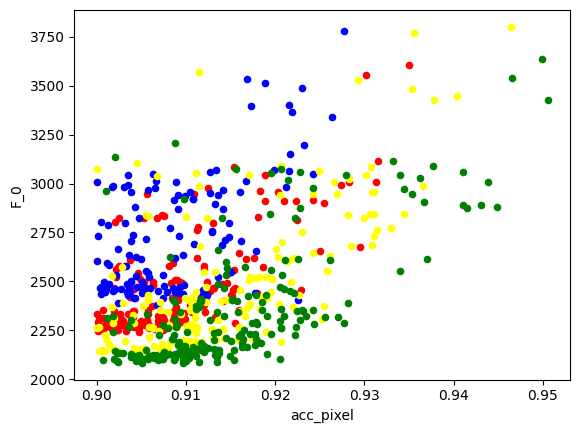

In [9]:
ax = df_005.plot(kind='scatter', x='acc_pixel', y='F_0', c='red')
df_01.plot(ax=ax, kind='scatter', x='acc_pixel', y='F_0', c='blue')
df_015.plot(ax=ax, kind='scatter', x='acc_pixel', y='F_0', c='yellow')
df_no.plot(ax=ax, kind='scatter', x='acc_pixel', y='F_0', c='green')

### Rain

In [14]:
import pandas as pd
import os
from model_explorer.result_handling.collect_results import collect_results

# unconstrained mobileNetv2
# path = '/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/sweep_deeplab_mobilenet'
# 5% deviation mobilenetv2
# path = '/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/sweep_deeplab_mobilenet_5percent'
# 5% deviation resnet101
path = '/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/sweep_deeplab_resnet101'

data = {}

for i, file in enumerate(os.listdir(path)):
    if os.path.splitext(file)[1] != '.pkl':
        continue

    try:
        r = collect_results(os.path.join(path, file))
        _, _, p, _, c = file.split('_')

        df = r.to_dataframe()
        df[['acc_pixel']] = pd.DataFrame(df.accuracies.tolist(), index=df.index)
        df = df[df['acc_pixel'] > r.accuracy_limit]
        
        data[i] = {
            'pattern': p,
            'comb': c.split('.')[0],
            'data' : df
        }
        
    except Exception as inst:
        print(f"{file}: Skipping since no solutions found, {inst.__str__()}")

print(len(data.items()))


36


In [15]:
from model_explorer.result_handling.collect_results import collect_results
import pandas as pd
# load baseline...
# mobileNet v2
# baseline_path = '/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/sweep_deeplab_mobilenet/baseline_mobilenetV2.pkl'
# resnet101
baseline_path = '/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/sweep_deeplab_resnet101/baseline_resnet101_deeplab.bl_pkl'
r = collect_results(baseline_path)
df_baseline = r.to_dataframe()
df_baseline[['acc_pixel']] = pd.DataFrame(df_baseline.accuracies.tolist(), index=df_baseline.index)
df_baseline = df_baseline[df_baseline['acc_pixel'] > r.accuracy_limit]


In [78]:
df_baseline

,generation,individual,accuracies,mutation_eta,mutation_prob,crossover_eta,crossover_prob,selection_press,F_0,F_1,parameters,acc_pixel
0,0,0,[0.9376895369096229],10,1.0,5,0.9,2,-0.937690,3043.5,"[8, 13, 10, 12, 9, 9, 12, 5, 10, 13, 9, 6, 12,...",0.937690
1,0,1,[0.9277234137863989],10,1.0,5,0.9,2,-0.927723,2824.0,"[12, 10, 14, 10, 6, 8, 7, 14, 8, 14, 9, 6, 5, ...",0.927723
2,0,2,[0.9372430885442702],10,1.0,5,0.9,2,-0.937243,3009.5,"[9, 12, 9, 12, 7, 6, 14, 11, 7, 10, 14, 5, 5, ...",0.937243
3,0,3,[0.533144583729562],10,1.0,5,0.9,2,-0.533145,2846.5,"[4, 4, 4, 6, 13, 9, 10, 12, 5, 7, 10, 14, 10, ...",0.533145
4,0,4,[0.8891252683105905],10,1.0,5,0.9,2,-0.889125,2853.5,"[6, 7, 7, 12, 12, 8, 10, 5, 9, 7, 13, 11, 10, ...",0.889125
...,...,...,...,...,...,...,...,...,...,...,...,...
140,28,3,[0.7439515838326037],10,1.0,5,0.9,2,-0.743952,1786.0,"[7, 10, 9, 10, 5, 6, 6, 5, 7, 5, 9, 4, 5, 7, 5...",0.743952
141,28,6,[0.7759226861092322],10,1.0,5,0.9,2,-0.775923,1787.5,"[7, 10, 8, 10, 5, 6, 6, 5, 7, 5, 9, 4, 5, 7, 5...",0.775923
142,28,13,[0.9531159405361604],10,1.0,5,0.9,2,-0.953116,3318.5,"[8, 13, 10, 12, 9, 9, 13, 11, 10, 13, 9, 6, 12...",0.953116
143,29,12,[0.7343179187756789],10,1.0,5,0.9,2,-0.734318,1782.0,"[7, 10, 8, 10, 5, 6, 6, 5, 7, 5, 9, 5, 5, 7, 5...",0.734318


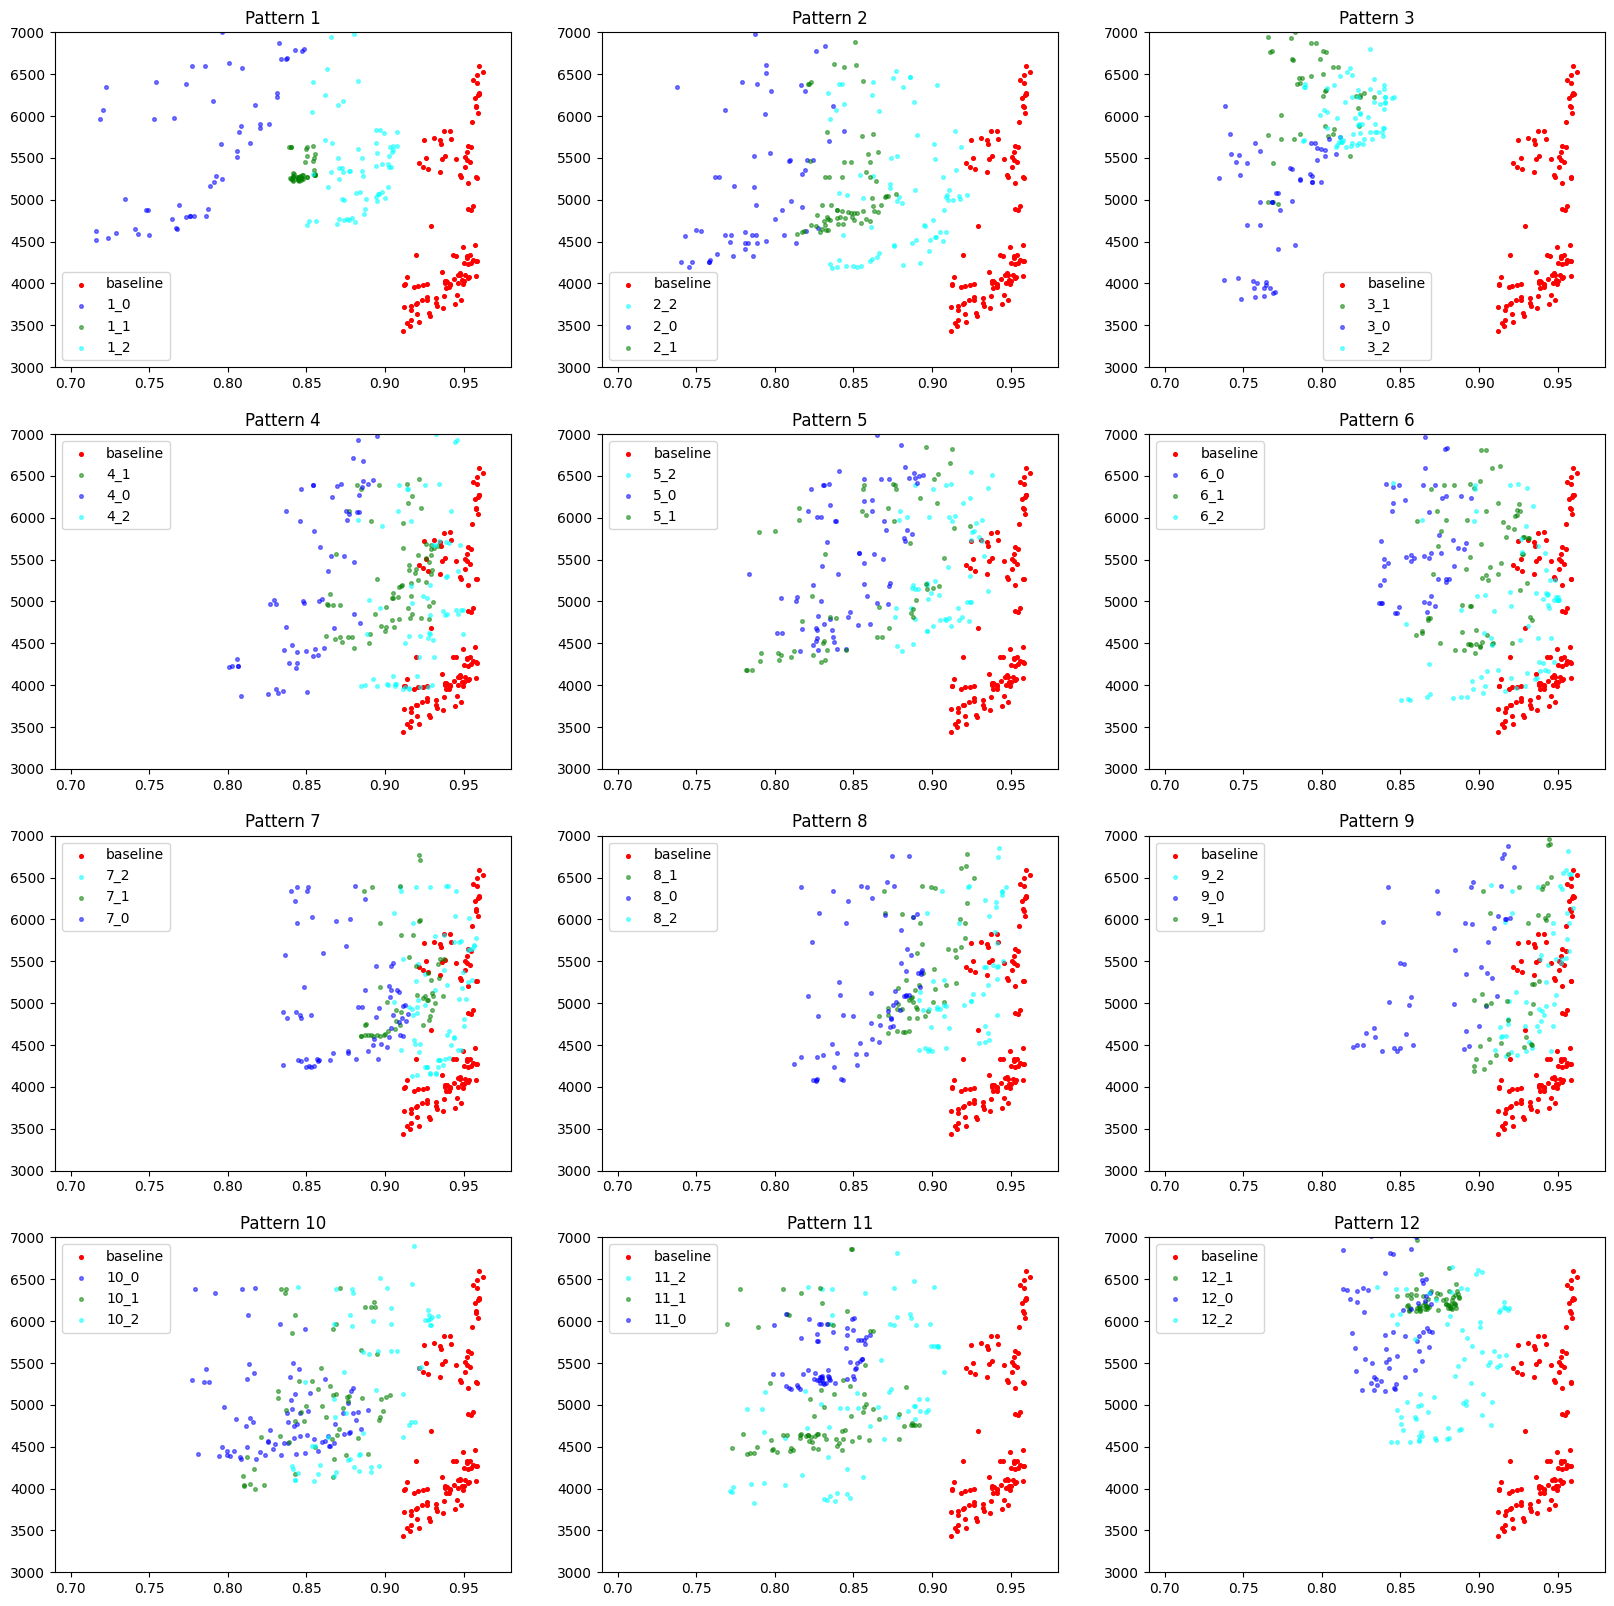

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20,20))

clrs = {0: 'blue', 1: 'green', 2:'cyan'}
ax = ax.reshape(-1)

for i, a in enumerate(ax.reshape(-1)):
    a.set_ylim((3000,7000))
    a.set_xlim((0.69,0.98))
    a.scatter(df_baseline['acc_pixel'], df_baseline['F_1'], s=7, c='red', label='baseline')
    for d in data.values():
        if int(d['pattern']) == i + 1:
            a.scatter(d['data']['acc_pixel'], d['data']['F_1'], alpha=0.5, s=7, c=clrs[int(d['comb'])], label=f'{d["pattern"]}_{d["comb"]}')
    a.legend()
    a.set_title(f"Pattern {i+1}")


### ResNet-50

In [10]:
import pandas as pd
import os
from model_explorer.result_handling.collect_results import collect_results

path = '/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/exploration_sweep_2023-04-28_10-00'
data = {}

for i, file in enumerate(os.listdir(path)):
    try:
        r = collect_results(os.path.join(path, file))
        _, _, c, _, s = file.split('_')

        df = r.to_dataframe()
        df[['acc_class']] = pd.DataFrame(df.accuracies.tolist(), index=df.index)
        df = df[df['acc_class'] > r.accuracy_limit]
        
        data[i] = {
            'condition': c,
            'severity': s.split('.')[0],
            'data' : df
        }
    except:
        print("Skipping since no solutions found")

print(len(data.items()))

Skipping since no solutions found
Skipping since no solutions found
19


In [6]:
baseline_path = '/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/old_results/results_resnet50_isvlsi/expl_quantization_problem_resnet50_imagenet_2023-03-12_19-50.pkl'
r = collect_results(baseline_path)
df_baseline = r.to_dataframe()
df_baseline[['acc_class']] = pd.DataFrame(df_baseline.accuracies.tolist(), index=df_baseline.index)
df_baseline = df_baseline[df_baseline['acc_class'] > r.accuracy_limit]

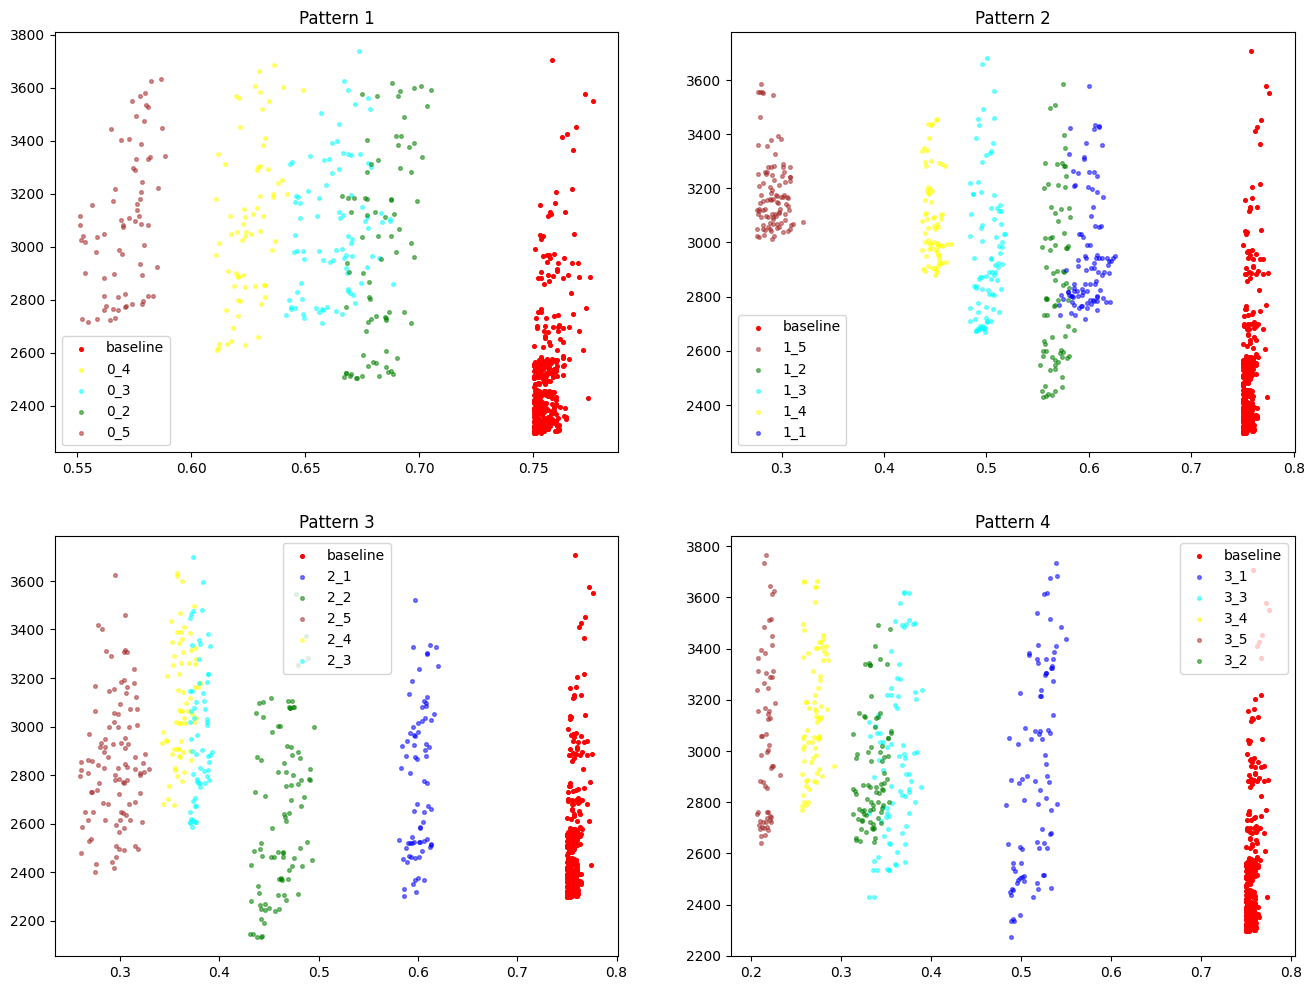

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

clrs = {0: 'blue', 1: 'green', 2:'cyan', 3: 'yellow', 4:'brown'}
ax = ax.reshape(-1)

for i, a in enumerate(ax.reshape(-1)):
    # a.set_ylim((1500,5000))
    # a.set_xlim((0.69,0.98))
    a.scatter(df_baseline['acc_class'], df_baseline['F_0'], s=7, c='red', label='baseline')
    for d in data.values():
        if int(d['condition']) == i:
            a.scatter(d['data']['acc_class'], d['data']['F_1'], alpha=0.5, s=7, c=clrs[int(d['severity']) - 1], label=f'{d["condition"]}_{d["severity"]}')
    a.legend()
    a.set_title(f"Pattern {i+1}")